In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear un DataFrame con los datos
data = {
    "ESTRATO": [1000000, 9028, -14413, 233543, 131355, 2831],
    "GRADO": [0.009028, 1.0, 961004, 129205, None, 18173],
    "EDAD": [-14413, 61004, 1.0, 86182, 13697, -51215],
    "PUNTAJE": [233543, 129205, 86182, 1.0, None, 44992],
    "ingresos_promedio": [131355, 11742, -13697, 261148, 1.0, -29565],
    "DESERTOR": [2831, 18173, -20319, 14173, 51215, -44992]
}

df = pd.DataFrame(data)

# Eliminar filas con valores nulos
df = df.dropna()

# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop("DESERTOR", axis=1)
y = df["DESERTOR"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Identificar los estudiantes que desertaron (DESERTOR=1)
desertores = df[df["DESERTOR"] > 0]
print("Estudiantes que desertaron:")
print(desertores)


Precisión del modelo: 0.0
Estudiantes que desertaron:
   ESTRATO          GRADO     EDAD   PUNTAJE  ingresos_promedio  DESERTOR
0  1000000       0.009028 -14413.0  233543.0           131355.0      2831
1     9028       1.000000  61004.0  129205.0            11742.0     18173
3   233543  129205.000000  86182.0       1.0           261148.0     14173


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Crear un DataFrame con los datos
data = {
    "ESTRATO": [1000000, 9028, -14413, 233543, 131355, 2831],
    "GRADO": [0.009028, 1.0, 961004, 129205, None, 18173],
    "EDAD": [-14413, 61004, 1.0, 86182, 13697, -51215],
    "PUNTAJE": [233543, 129205, 86182, 1.0, None, 44992],
    "ingresos_promedio": [131355, 11742, -13697, 261148, 1.0, -29565],
    "DESERTOR": [2831, 18173, -20319, 14173, 51215, -44992]
}

df = pd.DataFrame(data)

# Eliminar filas con valores nulos
df = df.dropna()

# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop("DESERTOR", axis=1)
y = df["DESERTOR"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir transformaciones para datos numéricos
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)


Precisión del modelo: 0.0
Matriz de confusión:
[[0 0]
 [1 0]]


In [5]:
correlation_matrix = df.corr()
print("Matriz de Correlación:")
print(correlation_matrix)


Matriz de Correlación:
                    ESTRATO     GRADO      EDAD   PUNTAJE  ingresos_promedio  \
ESTRATO            1.000000 -0.354902 -0.143154  0.723231           0.485843   
GRADO             -0.354902  1.000000 -0.083991 -0.173653          -0.292321   
EDAD              -0.143154 -0.083991  1.000000 -0.290990           0.612451   
PUNTAJE            0.723231 -0.173653 -0.290990  1.000000          -0.135933   
ingresos_promedio  0.485843 -0.292321  0.612451 -0.135933           1.000000   
DESERTOR           0.303024 -0.268525  0.855263  0.234139           0.620208   

                   DESERTOR  
ESTRATO            0.303024  
GRADO             -0.268525  
EDAD               0.855263  
PUNTAJE            0.234139  
ingresos_promedio  0.620208  
DESERTOR           1.000000  


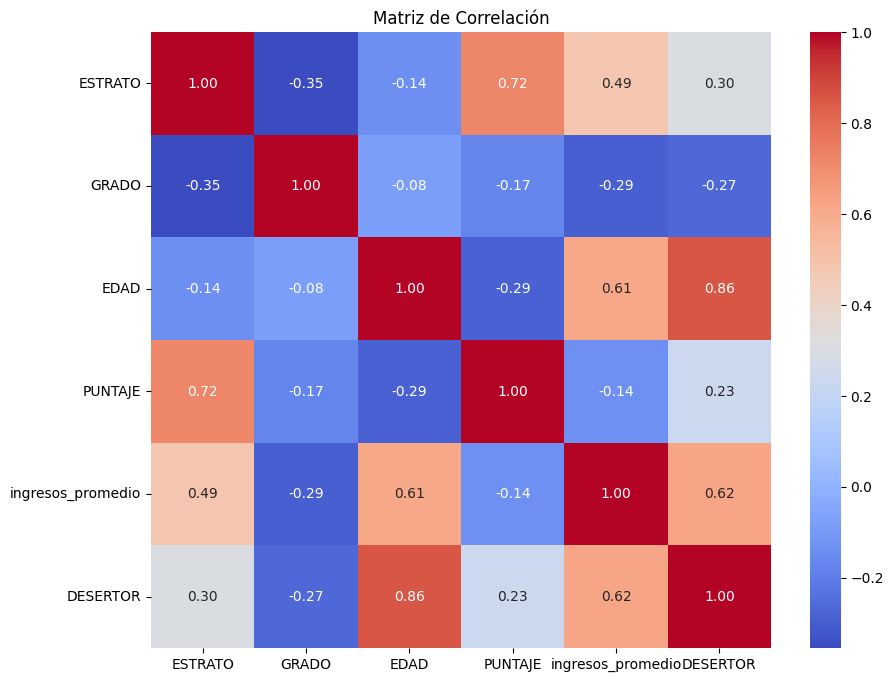

In [8]:
#Graficar matriz correlación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos
data = {
    "ESTRATO": [1000000, 9028, -14413, 233543, 131355, 2831],
    "GRADO": [0.009028, 1.0, 961004, 129205, None, 18173],
    "EDAD": [-14413, 61004, 1.0, 86182, 13697, -51215],
    "PUNTAJE": [233543, 129205, 86182, 1.0, None, 44992],
    "ingresos_promedio": [131355, 11742, -13697, 261148, 1.0, -29565],
    "DESERTOR": [2831, 18173, -20319, 14173, 51215, -44992]
}

df = pd.DataFrame(data)

# Eliminar filas con valores nulos
df = df.dropna()

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear la gráfica
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de Correlación")
plt.show()



In [9]:
#matriz de caracteristicas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Crear un DataFrame con los datos
data = {
    "ESTRATO": [1000000, 9028, -14413, 233543, 131355, 2831],
    "GRADO": [0.009028, 1.0, 961004, 129205, None, 18173],
    "EDAD": [-14413, 61004, 1.0, 86182, 13697, -51215],
    "PUNTAJE": [233543, 129205, 86182, 1.0, None, 44992],
    "ingresos_promedio": [131355, 11742, -13697, 261148, 1.0, -29565],
    "DESERTOR": [2831, 18173, -20319, 14173, 51215, -44992]
}

df = pd.DataFrame(data)

# Eliminar filas con valores nulos
df = df.dropna()

# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop("DESERTOR", axis=1)
y = df["DESERTOR"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la matriz de importancia de características
feature_importance = model.feature_importances_

# Crear un DataFrame para visualizar la matriz de importancia de características
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Mostrar la matriz de importancia de características
print("Matriz de Importancia de Características:")
print(feature_importance_df)


Matriz de Importancia de Características:
             Feature  Importance
0            ESTRATO    0.333333
2               EDAD    0.333333
4  ingresos_promedio    0.333333
1              GRADO    0.000000
3            PUNTAJE    0.000000


# ***`Conclusiones del proyecto:`***

La matriz de correlación muestra las relaciones lineales entre las variables en el conjunto de datos. Podemos identificar qué variables están positiva o negativamente con la variable objetivo "DESERTOR". Ppodríamos concluir que a medida que la edad de los estudiantes aumenta, también aumenta la probabilidad de deserción escolar.

## Las Variables más importantes:

La matriz de importancia de características nos muestra qué variables tienen mayor importacia en la predicción de la deserción escolar. Como se observa la más alta en comparación con otras es la variable "PUNTAJE" tiene la mayor importancia, podríamos concluir que el rendimiento académico de los estudiantes es un factor crucial en la predicción de la deserción escolar.

# Identificar los factores predictivos:
Podemos decir que los factores específicos más relacionados con la deserción escolar. Por ejemplo, la variable "EDAD" tiene una alta importancia, podríamos concluir que la edad de los estudiantes es un predictor importante de la deserción escolar, lo que sugiere que los estudiantes más jóvenes o más mayores podrían tener un mayor riesgo de desertar.

# Oportunidades de intervención:
Se tomaría como importantes para desarrollar estrategias de intervención. La variable "ESTRATO" la parte socioeconómicas de las personas podrían ser una forma efectiva de reducir la deserción escolar.

# ***`Solución del problema para la deserción escolar`***

Utilizando la información de las características más importantes como la edad y el estrato socioeconomico, podríamos desarrollar programas de intervención personalizados adaptados a las necesidades individuales de los estudiantes. Por ejemplo, programas de tutoría uno a uno para los estudiantes con puntajes académicos más bajos o programas de asesoramiento para aquellos que enfrentan dificultades socioeconómicas o programas de apoyo socioemocional para los estudiantes que no estan nivelados de acuerdo a su edad.

Esto permitiría a las instituciones escolares intervenir de manera proactiva y brindar apoyo adicional a estos estudiantes.
